In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
os.getcwd(),os.chdir(r'C:\Users\14049\WordAndStudy\Projects\学校\大三上\数字图像处理'),os.getcwd()

('C:\\Users\\14049\\WordAndStudy\\Projects\\JupyterNoteBook',
 None,
 'C:\\Users\\14049\\WordAndStudy\\Projects\\学校\\大三上\\数字图像处理')

# 读入灰度图像并计算累计直方图

In [3]:
gimg = cv2.imread(r'./jpg/gray-natasha-taylor-180782-unsplash.jpg')
# opencv 计算直方图 
hist = cv2.calcHist([gimg],[0],None,[256],[0,256])

In [4]:
type(gimg),type(hist),hist.shape

(numpy.ndarray, numpy.ndarray, (256, 1))

In [5]:
hist.shape = 256
hist[:10]

array([  311.,   320.,   475.,   762.,  1108.,  1701.,  2636.,  4825.,
       14154., 70943.], dtype=float32)

In [6]:
histList = hist.tolist()
type(histList),histList[:10]

(list,
 [311.0,
  320.0,
  475.0,
  762.0,
  1108.0,
  1701.0,
  2636.0,
  4825.0,
  14154.0,
  70943.0])

In [7]:
i = 1
while i<256:
    histList[i] = histList[i]+histList[i-1]
    i+=1
hist[:10],histList[:10]

(array([  311.,   320.,   475.,   762.,  1108.,  1701.,  2636.,  4825.,
        14154., 70943.], dtype=float32),
 [311.0,
  631.0,
  1106.0,
  1868.0,
  2976.0,
  4677.0,
  7313.0,
  12138.0,
  26292.0,
  97235.0])

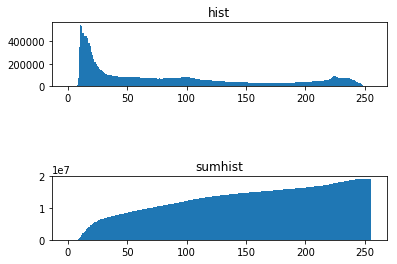

In [21]:
index = np.arange(0,256)
plt.subplot(311)
plt.bar(index,hist,width=1);
plt.title("hist")
plt.subplot(313)
plt.bar(index,histList,width=1);
plt.title('sumhist')
plt.show()

In [22]:
cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2.imshow('image',gimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 装箱直方图

In [32]:
histList = hist.tolist() 

In [37]:
histSize = 8
tmpList = []

for i in range(0,256,8):
    tmpList.append(sum(histList[i:i+8]))

histList[:16],tmpList[:2],len(histList),len(tmpList)

([311.0,
  320.0,
  475.0,
  762.0,
  1108.0,
  1701.0,
  2636.0,
  4825.0,
  14154.0,
  70943.0,
  346592.0,
  539657.0,
  530757.0,
  476113.0,
  446749.0,
  447606.0],
 [12138.0, 2872571.0],
 256,
 32)

# 装箱直方图

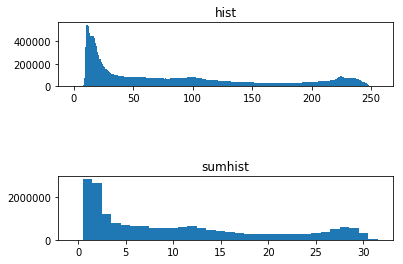

In [40]:
index = np.arange(0,256)
zindex = np.arange(0,256//8)
plt.subplot(311)
plt.bar(index,histList,width=1);
plt.title("hist")
plt.subplot(313)
plt.bar(zindex,tmpList,width=1);
plt.title('sumhist')
plt.show()